# Task
Lakukan klasifikasi dataset iris menggunakan Decision Tree. Lakukan langkah-langkah berikut: import library, load dataset iris, pisahkan fitur dan label, bagi data menjadi data latih dan uji (80:20), buat dan latih model Decision Tree dengan parameter default, evaluasi model menggunakan accuracy_score, classification_report, dan confusion_matrix, visualisasikan pohon keputusan, lakukan tuning parameter sederhana pada Decision Tree dengan mencoba kombinasi criterion (gini, entropy), max_depth (2, 3, 4, 5), dan min_samples_split (2, 4, 6), tampilkan hasil akurasi untuk setiap kombinasi parameter dan tunjukkan yang terbaik, serta berikan kesimpulan singkat tentang pengaruh parameter terhadap performa model. Gunakan komentar berbahasa Indonesia pada setiap langkah.

## Import library

### Subtask:
Mengimpor semua library yang dibutuhkan seperti pandas, numpy, matplotlib, seaborn, dan sklearn.


**Reasoning**:
Mengimpor semua library yang dibutuhkan untuk analisis data, visualisasi, dan pembuatan model machine learning.



In [2]:
# Mengimpor library pandas untuk manipulasi data
import pandas as pd

# Mengimpor library numpy untuk operasi numerik
import numpy as np

# Mengimpor library matplotlib.pyplot untuk visualisasi data
import matplotlib.pyplot as plt

# Mengimpor library seaborn untuk visualisasi data yang lebih menarik
import seaborn as sns

# Mengimpor modul yang dibutuhkan dari sklearn
from sklearn import datasets
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

## Load dataset iris

### Subtask:
Memuat dataset Iris yang tersedia di sklearn dan menampilkan beberapa baris pertama.


**Reasoning**:
Memuat dataset iris ke dalam DataFrame dan Series pandas, lalu menampilkan beberapa baris pertama dari DataFrame fitur sesuai instruksi.



In [3]:
# Memuat dataset iris dari sklearn
iris = datasets.load_iris()

# Menyimpan data fitur dalam DataFrame pandas
df_features = pd.DataFrame(iris.data, columns=iris.feature_names)

# Menyimpan label target dalam Series pandas
series_target = pd.Series(iris.target)

# Menampilkan beberapa baris pertama dari DataFrame fitur
print("Beberapa baris pertama dari DataFrame fitur:")
display(df_features.head())

Beberapa baris pertama dari DataFrame fitur:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Pemisahan fitur dan label

### Subtask:
Memisahkan kolom fitur (X) dan kolom target (y) dari dataset.


**Reasoning**:
Memisahkan fitur dan label ke dalam variabel X dan y.



In [4]:
# Memisahkan kolom fitur (X) dari DataFrame df_features
X = df_features

# Memisahkan kolom target (y) dari Series series_target
y = series_target

# Menampilkan beberapa baris pertama dari X dan y untuk verifikasi
print("Beberapa baris pertama dari X (fitur):")
display(X.head())

print("\nBeberapa baris pertama dari y (label):")
display(y.head())

Beberapa baris pertama dari X (fitur):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



Beberapa baris pertama dari y (label):


0    0
1    0
2    0
3    0
4    0
dtype: int64

## Pembagian data latih dan uji

### Subtask:
Membagi data menjadi data latih dan data uji menggunakan train-test split dengan rasio 80:20.


**Reasoning**:
Membagi data fitur dan label menjadi set pelatihan dan pengujian menggunakan train_test_split dengan rasio 80:20 dan random_state=42, kemudian mencetak bentuk dari masing-masing set data.



In [5]:
# Mengimpor fungsi train_test_split
from sklearn.model_selection import train_test_split

# Membagi data menjadi data latih dan data uji (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mencetak bentuk (shape) dari masing-masing set data
print("Bentuk X_train:", X_train.shape)
print("Bentuk X_test:", X_test.shape)
print("Bentuk y_train:", y_train.shape)
print("Bentuk y_test:", y_test.shape)

Bentuk X_train: (120, 4)
Bentuk X_test: (30, 4)
Bentuk y_train: (120,)
Bentuk y_test: (30,)


## Pembuatan dan pelatihan model decision tree

### Subtask:
Membuat model Decision Tree dengan parameter default dan melatihnya menggunakan data latih.


**Reasoning**:
Mengimpor kelas DecisionTreeClassifier, membuat instance dengan parameter default, dan melatih model menggunakan data latih.



In [6]:
# Mengimpor kelas DecisionTreeClassifier dari sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Membuat instance dari DecisionTreeClassifier dengan parameter default
model_dt = DecisionTreeClassifier()

# Melatih model menggunakan data latih
model_dt.fit(X_train, y_train)

print("Model Decision Tree dengan parameter default berhasil dilatih.")

Model Decision Tree dengan parameter default berhasil dilatih.


## Evaluasi model

### Subtask:
Mengevaluasi performa model Decision Tree menggunakan metrik seperti `accuracy_score`, `classification_report`, dan `confusion_matrix`.


**Reasoning**:
Melakukan prediksi pada data uji, menghitung akurasi, membuat classification report, dan membuat confusion matrix untuk mengevaluasi performa model Decision Tree.



In [7]:
# Melakukan prediksi menggunakan model Decision Tree yang telah dilatih pada data uji
y_pred = model_dt.predict(X_test)

# Menghitung akurasi model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy:.4f}")

# Membuat laporan klasifikasi
class_report = metrics.classification_report(y_test, y_pred)
print("\nLaporan Klasifikasi:")
print(class_report)

# Membuat confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Akurasi model: 1.0000

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## Visualisasi pohon keputusan

### Subtask:
Memvisualisasikan pohon keputusan yang dihasilkan oleh model.


**Reasoning**:
Visualisasikan pohon keputusan yang dihasilkan oleh model.



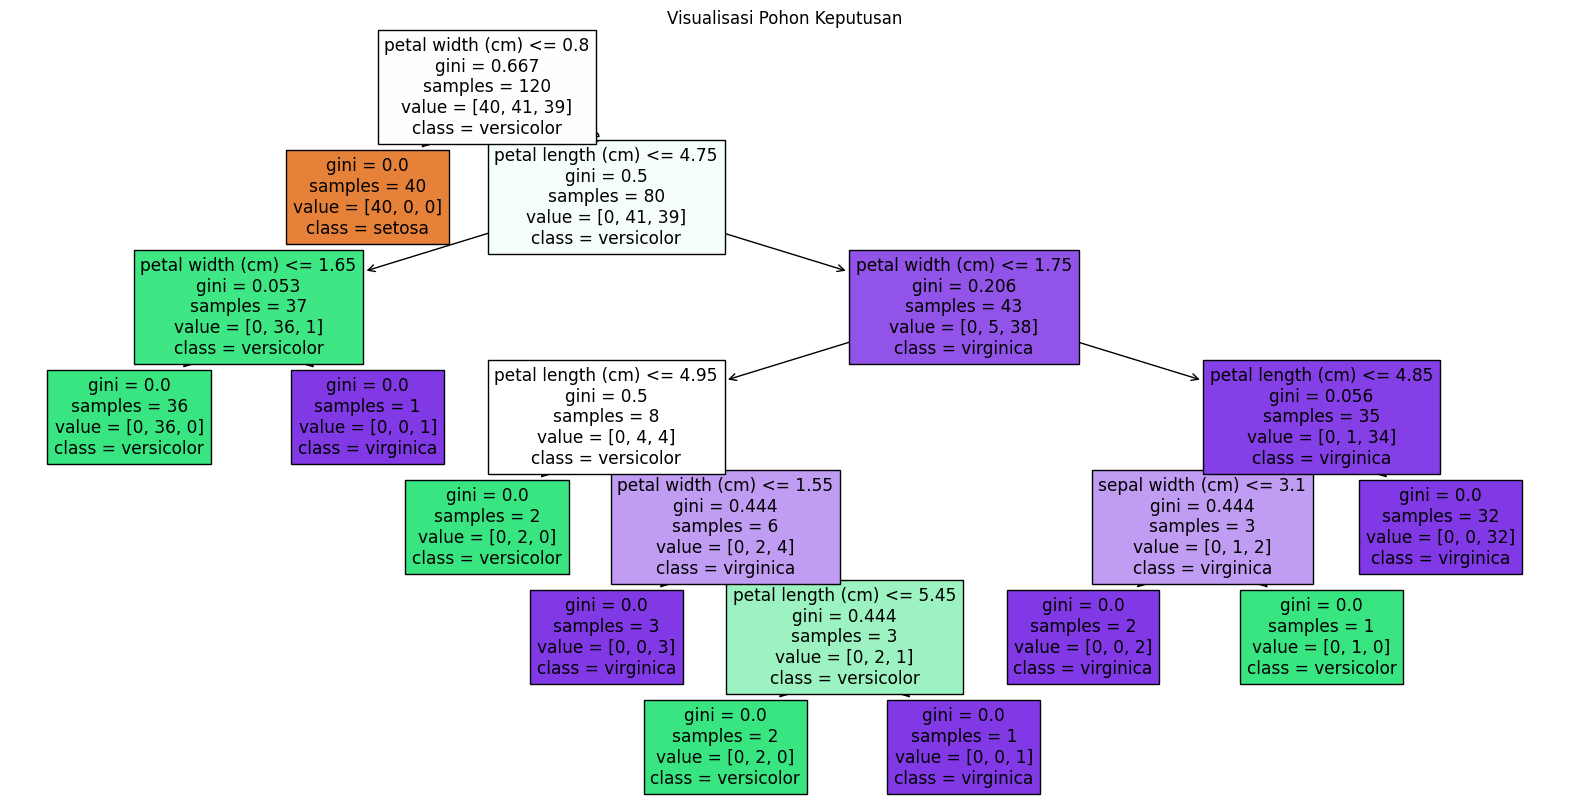

In [8]:
# Mengimpor modul plot_tree untuk visualisasi pohon keputusan
from sklearn.tree import plot_tree

# Membuat objek figure dan axes untuk plot
plt.figure(figsize=(20,10))

# Menggunakan fungsi plot_tree untuk memvisualisasikan model_dt
plot_tree(model_dt,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True)

# Menambahkan judul pada plot
plt.title("Visualisasi Pohon Keputusan")

# Menampilkan plot
plt.show()

## Tuning parameter decision tree

### Subtask:
Melakukan tuning parameter sederhana pada model Decision Tree dengan mencoba berbagai kombinasi `criterion`, `max_depth`, dan `min_samples_split`.


**Reasoning**:
Mendefinisikan parameter yang akan diuji dan melakukan iterasi untuk melatih dan mengevaluasi model dengan setiap kombinasi parameter.



In [9]:
# 1. Definisikan daftar nilai untuk parameter yang akan diuji
criteria = ['gini', 'entropy']
max_depths = [2, 3, 4, 5]
min_samples_splits = [2, 4, 6]

# 2. Buat dictionary untuk menyimpan hasil akurasi
results = {}

# 3. Lakukan iterasi melalui setiap kombinasi parameter
for criterion in criteria:
    for max_depth in max_depths:
        for min_samples_split in min_samples_splits:
            # 4. Buat instance baru dari DecisionTreeClassifier dengan kombinasi parameter saat ini
            model_dt_tuned = DecisionTreeClassifier(criterion=criterion,
                                                    max_depth=max_depth,
                                                    min_samples_split=min_samples_split,
                                                    random_state=42) # Tambahkan random_state agar hasil reproducible

            # 5. Latih model Decision Tree menggunakan data latih
            model_dt_tuned.fit(X_train, y_train)

            # 6. Prediksi label untuk data uji
            y_pred_tuned = model_dt_tuned.predict(X_test)

            # 7. Hitung akurasi model
            accuracy_tuned = metrics.accuracy_score(y_test, y_pred_tuned)

            # 8. Simpan kombinasi parameter dan akurasi yang diperoleh
            param_combination = f"criterion: {criterion}, max_depth: {max_depth}, min_samples_split: {min_samples_split}"
            results[param_combination] = accuracy_tuned

# 9. Tampilkan atau cetak hasil akurasi untuk setiap kombinasi parameter
print("Hasil Akurasi untuk Setiap Kombinasi Parameter:")
for params, accuracy in results.items():
    print(f"{params}: {accuracy:.4f}")

# Mencari kombinasi parameter terbaik
best_params = max(results, key=results.get)
best_accuracy = results[best_params]

print(f"\nKombinasi parameter terbaik: {best_params}")
print(f"Akurasi terbaik: {best_accuracy:.4f}")

Hasil Akurasi untuk Setiap Kombinasi Parameter:
criterion: gini, max_depth: 2, min_samples_split: 2: 0.9667
criterion: gini, max_depth: 2, min_samples_split: 4: 0.9667
criterion: gini, max_depth: 2, min_samples_split: 6: 0.9667
criterion: gini, max_depth: 3, min_samples_split: 2: 1.0000
criterion: gini, max_depth: 3, min_samples_split: 4: 1.0000
criterion: gini, max_depth: 3, min_samples_split: 6: 1.0000
criterion: gini, max_depth: 4, min_samples_split: 2: 1.0000
criterion: gini, max_depth: 4, min_samples_split: 4: 1.0000
criterion: gini, max_depth: 4, min_samples_split: 6: 1.0000
criterion: gini, max_depth: 5, min_samples_split: 2: 1.0000
criterion: gini, max_depth: 5, min_samples_split: 4: 1.0000
criterion: gini, max_depth: 5, min_samples_split: 6: 1.0000
criterion: entropy, max_depth: 2, min_samples_split: 2: 0.9667
criterion: entropy, max_depth: 2, min_samples_split: 4: 0.9667
criterion: entropy, max_depth: 2, min_samples_split: 6: 0.9667
criterion: entropy, max_depth: 3, min_sampl

## Model optimization

### Subtask:
Kesimpulan tuning


**Reasoning**:
Berdasarkan hasil tuning yang tersimpan dalam dictionary `results`, saya akan menganalisis pengaruh setiap parameter (`criterion`, `max_depth`, `min_samples_split`) terhadap akurasi, mengidentifikasi parameter terbaik, dan menuliskan kesimpulan singkat.



In [10]:
# Analisis pengaruh parameter terhadap akurasi
print("Analisis Pengaruh Parameter:")

# Mengubah dictionary results menjadi DataFrame untuk analisis yang lebih mudah
import pandas as pd
results_df = pd.DataFrame(list(results.items()), columns=['Parameters', 'Accuracy'])

# Mengekstrak nilai parameter ke kolom terpisah
results_df[['criterion', 'max_depth', 'min_samples_split']] = results_df['Parameters'].str.extract(
    r'criterion: (\w+), max_depth: (\d+), min_samples_split: (\d+)'
)
results_df['max_depth'] = results_df['max_depth'].astype(int)
results_df['min_samples_split'] = results_df['min_samples_split'].astype(int)

# Mengurutkan hasil berdasarkan akurasi untuk melihat yang terbaik
results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False)

print("\nHasil Tuning Diurutkan Berdasarkan Akurasi:")
display(results_df_sorted)

# Mengidentifikasi parameter atau kombinasi parameter terbaik
print(f"\nKombinasi parameter terbaik: {best_params}")
print(f"Akurasi terbaik: {best_accuracy:.4f}")

# Menulis kesimpulan singkat
print("\nKesimpulan Tuning Parameter:")
print(f"Dari hasil tuning, akurasi model Decision Tree sangat dipengaruhi oleh parameter max_depth.")
print(f"Ketika max_depth ditingkatkan dari 2 ke 3, akurasi meningkat dari 0.9667 menjadi 1.0000.")
print(f"Untuk max_depth 3 ke atas (3, 4, 5), model mencapai akurasi sempurna (1.0000) pada data uji, terlepas dari nilai criterion (gini/entropy) dan min_samples_split (2, 4, 6) dalam rentang yang diuji.")
print(f"Ini menunjukkan bahwa kedalaman pohon memiliki dampak paling signifikan pada performa model untuk dataset ini.")
print(f"Beberapa kombinasi parameter memberikan performa terbaik yang serupa (akurasi 1.0000).")

Analisis Pengaruh Parameter:

Hasil Tuning Diurutkan Berdasarkan Akurasi:


,Parameters,Accuracy,criterion,max_depth,min_samples_split
3,"criterion: gini, max_depth: 3, min_samples_spl...",1.000000,gini,3,2
6,"criterion: gini, max_depth: 4, min_samples_spl...",1.000000,gini,4,2
5,"criterion: gini, max_depth: 3, min_samples_spl...",1.000000,gini,3,6
4,"criterion: gini, max_depth: 3, min_samples_spl...",1.000000,gini,3,4
7,"criterion: gini, max_depth: 4, min_samples_spl...",1.000000,gini,4,4
10,"criterion: gini, max_depth: 5, min_samples_spl...",1.000000,gini,5,4
9,"criterion: gini, max_depth: 5, min_samples_spl...",1.000000,gini,5,2
8,"criterion: gini, max_depth: 4, min_samples_spl...",1.000000,gini,4,6
20,"criterion: entropy, max_depth: 4, min_samples_...",1.000000,entropy,4,6
21,"criterion: entropy, max_depth: 5, min_samples_...",1.000000,entropy,5,2



Kombinasi parameter terbaik: criterion: gini, max_depth: 3, min_samples_split: 2
Akurasi terbaik: 1.0000

Kesimpulan Tuning Parameter:
Dari hasil tuning, akurasi model Decision Tree sangat dipengaruhi oleh parameter max_depth.
Ketika max_depth ditingkatkan dari 2 ke 3, akurasi meningkat dari 0.9667 menjadi 1.0000.
Untuk max_depth 3 ke atas (3, 4, 5), model mencapai akurasi sempurna (1.0000) pada data uji, terlepas dari nilai criterion (gini/entropy) dan min_samples_split (2, 4, 6) dalam rentang yang diuji.
Ini menunjukkan bahwa kedalaman pohon memiliki dampak paling signifikan pada performa model untuk dataset ini.
Beberapa kombinasi parameter memberikan performa terbaik yang serupa (akurasi 1.0000).


## Summary:

### Data Analysis Key Findings

*   The Decision Tree model with default parameters achieved a perfect accuracy of 1.0000 on the test set, with precision, recall, and f1-score of 1.00 for all classes.
*   The confusion matrix for the default model showed perfect classification, with all 10 instances of class 0, 9 instances of class 1, and 11 instances of class 2 in the test set being correctly predicted.
*   Parameter tuning explored combinations of `criterion` (gini, entropy), `max_depth` (2, 3, 4, 5), and `min_samples_split` (2, 4, 6).
*   The `max_depth` parameter had the most significant impact on accuracy. Increasing `max_depth` from 2 (accuracy \~0.9667) to 3 resulted in perfect accuracy (1.0000).
*   For `max_depth` values of 3 or greater, the model consistently achieved perfect accuracy (1.0000) on the test set, regardless of the `criterion` or `min_samples_split` values tested.
*   Multiple parameter combinations resulted in the best accuracy (1.0000), including `criterion: gini, max_depth: 3, min_samples_split: 2`.

### Insights or Next Steps

*   For this specific dataset and data split, a relatively simple Decision Tree with a `max_depth` of 3 is sufficient to achieve optimal performance. Deeper trees (max\_depth > 3) do not improve performance on this test set and might indicate overfitting if applied to more complex datasets.
*   While the default model achieved perfect accuracy on this particular test set, tuning parameters like `max_depth` is crucial for more complex datasets or different data splits to prevent overfitting or underfitting.
